In [361]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as numpy
df = pd.read_csv('SBAnational.csv')

df.head(5)


C:\Users\socci\AppData\Local\Temp\ipykernel_13088\4237066746.py:4: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('SBAnational.csv')


,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,...,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,...,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,...,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


In [362]:
df.shape

(899164, 27)

In [363]:
df['BalanceGross'].unique()

array(['$0.00 ', '$12,750.00 ', '$827,875.00 ', '$25,000.00 ',
       '$37,100.00 ', '$43,127.00 ', '$84,617.00 ', '$1,760.00 ',
       '$115,820.00 ', '$996,262.00 ', '$395,476.00 ', '$41,509.00 ',
       '$600.00 ', '$9,111.00 ', '$96,908.00 '], dtype=object)

In [364]:
df.columns

Index(['LoanNr_ChkDgt', 'Name', 'City', 'State', 'Zip', 'Bank', 'BankState',
       'NAICS', 'ApprovalDate', 'ApprovalFY', 'Term', 'NoEmp', 'NewExist',
       'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural', 'RevLineCr',
       'LowDoc', 'ChgOffDate', 'DisbursementDate', 'DisbursementGross',
       'BalanceGross', 'MIS_Status', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv'],
      dtype='object')

In [365]:
df = df.drop(['LoanNr_ChkDgt','Name','City','Bank', 'ApprovalDate', 'ApprovalFY','ChgOffDate','DisbursementDate', 'DisbursementGross', 'BalanceGross', 'ChgOffPrinGr' 	], axis=1)

In [366]:
df.columns

Index(['State', 'Zip', 'BankState', 'NAICS', 'Term', 'NoEmp', 'NewExist',
       'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural', 'RevLineCr',
       'LowDoc', 'MIS_Status', 'GrAppv', 'SBA_Appv'],
      dtype='object')

In [367]:


df.isna().sum()

State              14
Zip                 0
BankState        1566
NAICS               0
Term                0
NoEmp               0
NewExist          136
CreateJob           0
RetainedJob         0
FranchiseCode       0
UrbanRural          0
RevLineCr        4528
LowDoc           2582
MIS_Status       1997
GrAppv              0
SBA_Appv            0
dtype: int64

In [368]:
#enlever les nan dans la feature target
df = df.dropna(subset=['MIS_Status'])

In [369]:
df.isna().sum()

State              13
Zip                 0
BankState        1513
NAICS               0
Term                0
NoEmp               0
NewExist          134
CreateJob           0
RetainedJob         0
FranchiseCode       0
UrbanRural          0
RevLineCr        4520
LowDoc           2578
MIS_Status          0
GrAppv              0
SBA_Appv            0
dtype: int64

In [370]:
df.shape


(897167, 16)

In [371]:
df = df.drop_duplicates()
df.shape

(896223, 16)

In [372]:
df.head()

,State,Zip,BankState,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,MIS_Status,GrAppv,SBA_Appv
0,IN,47711,OH,451120,84,4,2.0,0,0,1,0,N,Y,P I F,"$60,000.00","$48,000.00"
1,IN,46526,IN,722410,60,2,2.0,0,0,1,0,N,Y,P I F,"$40,000.00","$32,000.00"
2,IN,47401,IN,621210,180,7,1.0,0,0,1,0,N,N,P I F,"$287,000.00","$215,250.00"
3,OK,74012,OK,0,60,2,1.0,0,0,1,0,N,Y,P I F,"$35,000.00","$28,000.00"
4,FL,32801,FL,0,240,14,1.0,7,7,1,0,N,N,P I F,"$229,000.00","$229,000.00"


In [373]:
df.dtypes

State             object
Zip                int64
BankState         object
NAICS              int64
Term               int64
NoEmp              int64
NewExist         float64
CreateJob          int64
RetainedJob        int64
FranchiseCode      int64
UrbanRural         int64
RevLineCr         object
LowDoc            object
MIS_Status        object
GrAppv            object
SBA_Appv          object
dtype: object

In [374]:
#replace dollar et convertir en float
df['GrAppv'] = df['GrAppv'].replace('[\$,]', '', regex=True).astype(float)
df['SBA_Appv'] = df['SBA_Appv'].replace('[\$,]', '', regex=True).astype(float)

In [375]:
df.to_csv('dataset_test.csv', index=False)
df.head(20)

,State,Zip,BankState,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,MIS_Status,GrAppv,SBA_Appv
0,IN,47711,OH,451120,84,4,2.0,0,0,1,0,N,Y,P I F,60000.0,48000.0
1,IN,46526,IN,722410,60,2,2.0,0,0,1,0,N,Y,P I F,40000.0,32000.0
2,IN,47401,IN,621210,180,7,1.0,0,0,1,0,N,N,P I F,287000.0,215250.0
3,OK,74012,OK,0,60,2,1.0,0,0,1,0,N,Y,P I F,35000.0,28000.0
4,FL,32801,FL,0,240,14,1.0,7,7,1,0,N,N,P I F,229000.0,229000.0
5,CT,6062,DE,332721,120,19,1.0,0,0,1,0,N,N,P I F,517000.0,387750.0
6,NJ,7083,SD,0,45,45,2.0,0,0,0,0,N,N,CHGOFF,600000.0,499998.0
7,FL,34491,AL,811118,84,1,2.0,0,0,1,0,N,Y,P I F,45000.0,36000.0
8,FL,32456,FL,721310,297,2,2.0,0,0,1,0,N,N,P I F,305000.0,228750.0
9,CT,6073,CT,0,84,3,2.0,0,0,1,0,N,Y,P I F,70000.0,56000.0


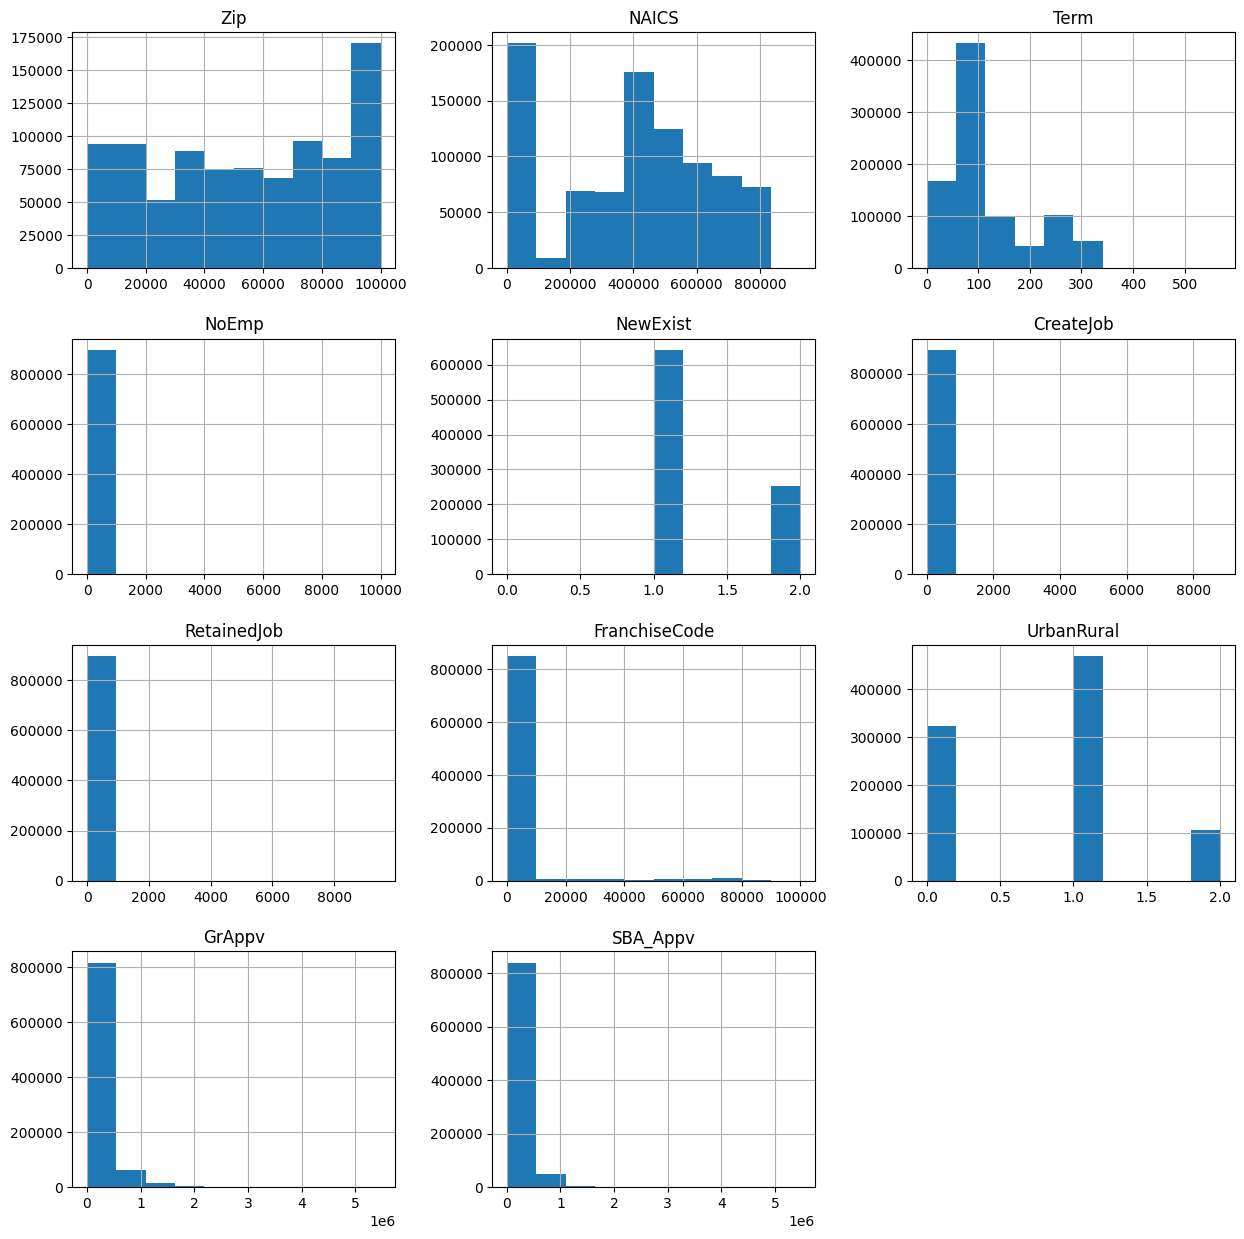

In [376]:
df.hist(figsize = (15,15));

In [377]:
#target proportion 
df['MIS_Status'].value_counts()


MIS_Status
P I F     738679
CHGOFF    157544
Name: count, dtype: int64

<Axes: >

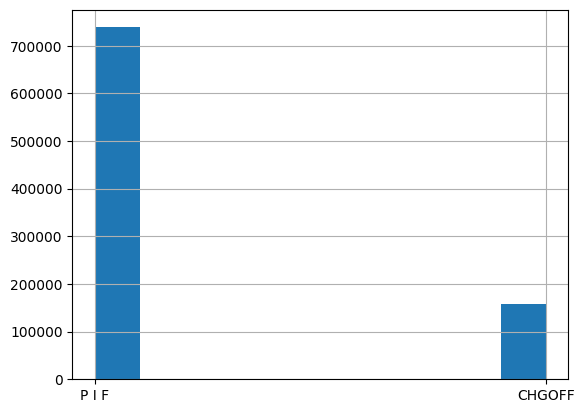

In [378]:
df['MIS_Status'].hist()

In [379]:
df.head()

,State,Zip,BankState,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,MIS_Status,GrAppv,SBA_Appv
0,IN,47711,OH,451120,84,4,2.0,0,0,1,0,N,Y,P I F,60000.0,48000.0
1,IN,46526,IN,722410,60,2,2.0,0,0,1,0,N,Y,P I F,40000.0,32000.0
2,IN,47401,IN,621210,180,7,1.0,0,0,1,0,N,N,P I F,287000.0,215250.0
3,OK,74012,OK,0,60,2,1.0,0,0,1,0,N,Y,P I F,35000.0,28000.0
4,FL,32801,FL,0,240,14,1.0,7,7,1,0,N,N,P I F,229000.0,229000.0


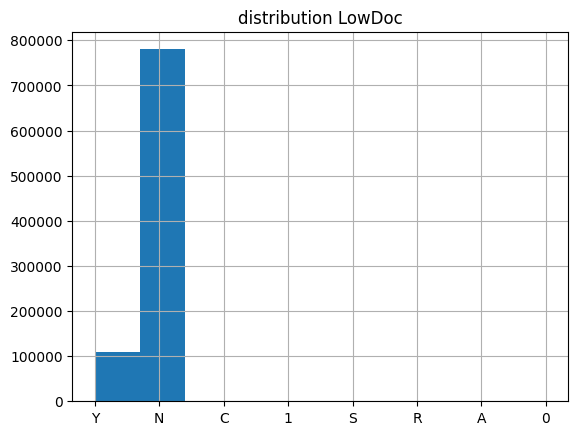

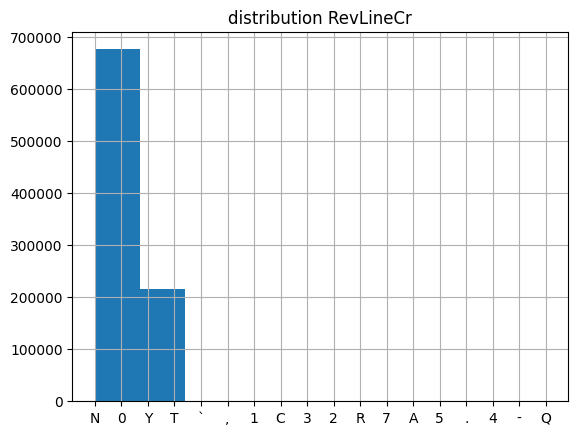

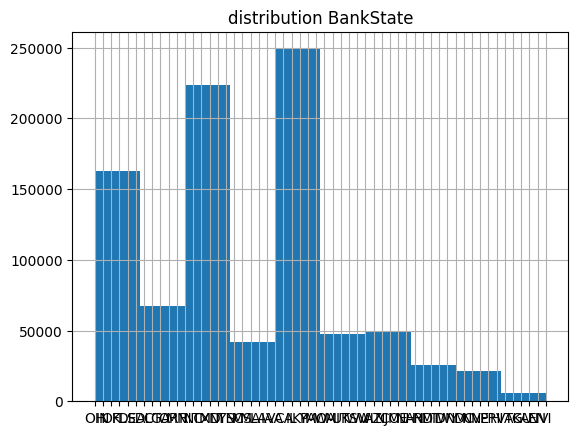

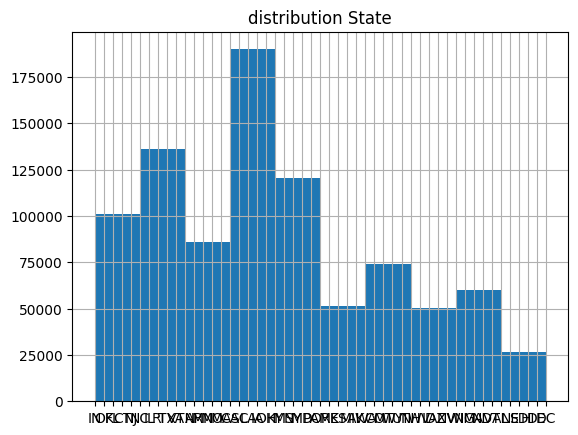

In [380]:
cat_col = ['LowDoc', 'RevLineCr', 'BankState', 'State']

for col in cat_col:
    df[col].hist()
    plt.title(f'distribution {col}')
    plt.show()

Zip                 Axes(0.125,0.712609;0.227941x0.167391)
NAICS            Axes(0.398529,0.712609;0.227941x0.167391)
Term             Axes(0.672059,0.712609;0.227941x0.167391)
NoEmp               Axes(0.125,0.511739;0.227941x0.167391)
NewExist         Axes(0.398529,0.511739;0.227941x0.167391)
CreateJob        Axes(0.672059,0.511739;0.227941x0.167391)
RetainedJob          Axes(0.125,0.31087;0.227941x0.167391)
FranchiseCode     Axes(0.398529,0.31087;0.227941x0.167391)
UrbanRural        Axes(0.672059,0.31087;0.227941x0.167391)
GrAppv                  Axes(0.125,0.11;0.227941x0.167391)
SBA_Appv             Axes(0.398529,0.11;0.227941x0.167391)
dtype: object

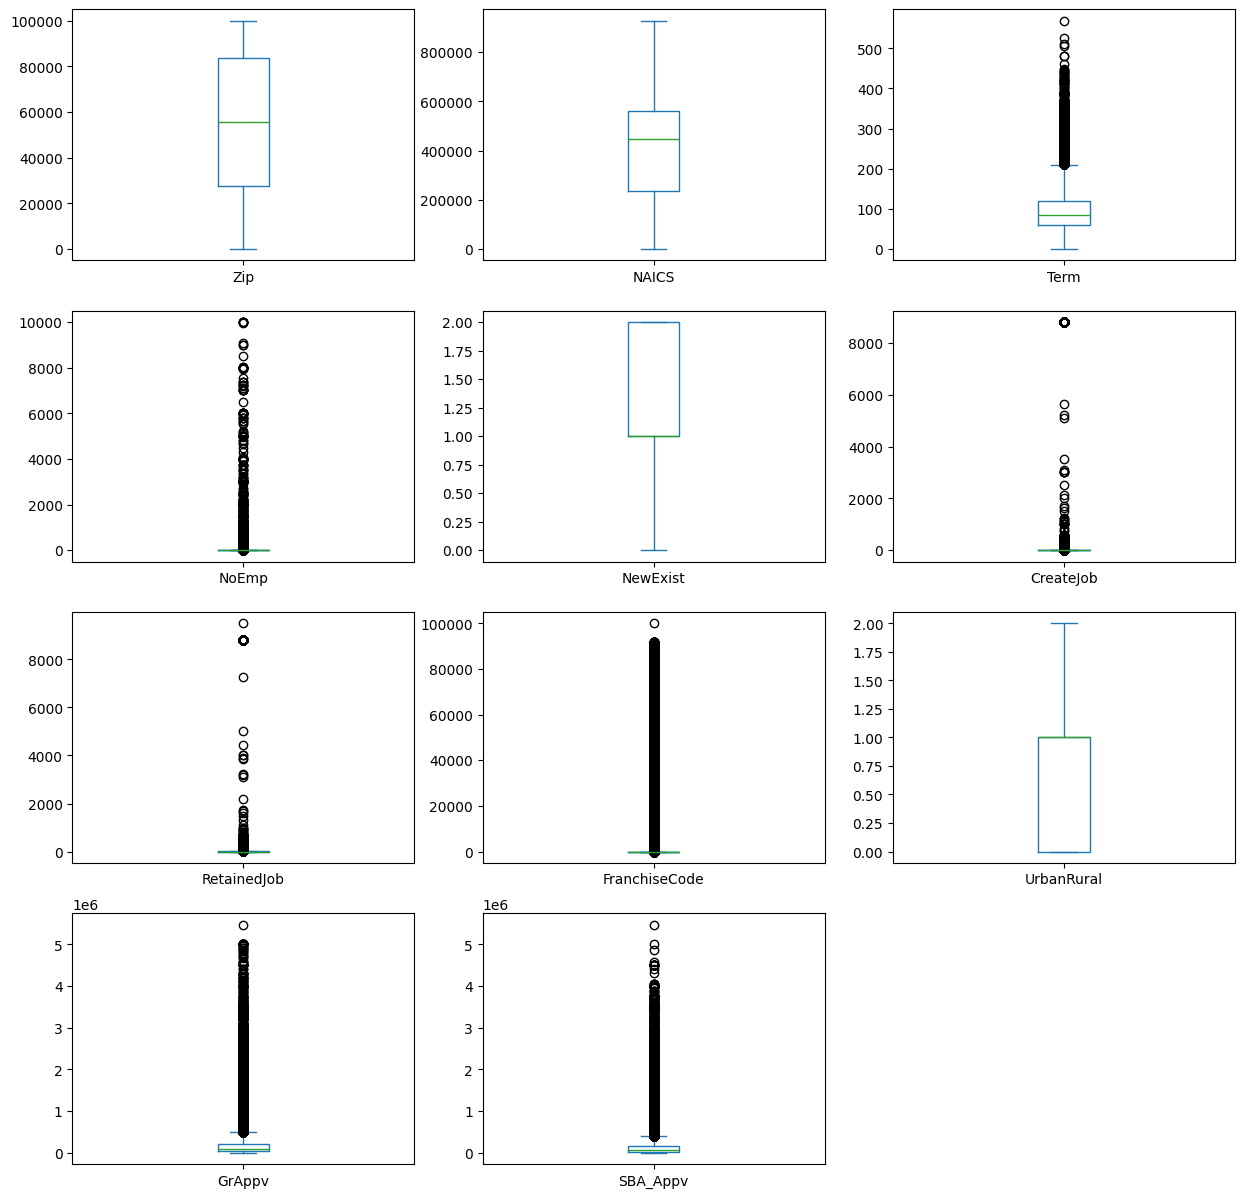

In [381]:
df.plot(kind='box',
          subplots=True,
          layout=(4,3),
          sharex= False, #share x -> le meme x donc le desactiver
          figsize = (15,15) #regler la taille des plots
          )

In [382]:
cat_col = ['LowDoc', 'RevLineCr', 'BankState', 'State']

for col in cat_col:
    print(df[col].value_counts())
    

LowDoc
N    780094
Y    110134
0      1489
C       758
S       603
A       495
R        74
1         1
Name: count, dtype: int64
RevLineCr
N    418852
0    257280
Y    200285
T     15221
1        23
R        14
`        11
2         6
C         2
3         1
,         1
7         1
A         1
5         1
.         1
4         1
-         1
Q         1
Name: count, dtype: int64
BankState
CA    117866
NC     79396
IL     65783
OH     58378
SD     51043
TX     47730
RI     44041
NY     39495
VA     28954
DE     24509
MN     19931
UT     18985
PA     17017
WI     15383
MO     14819
MA     13825
GA     13801
FL     13795
AL     12119
OR     11352
WA     10676
CO     10577
CT      9902
IA      9850
NJ      9427
KS      8861
MT      7832
IN      7611
SC      7469
MI      7354
OK      7314
MD      6983
NH      6786
AR      6307
MS      5911
TN      5617
NE      5326
ND      5073
LA      5053
VT      4749
NM      4408
KY      4376
NV      4323
ID      4312
DC      4003
AZ      3956
ME      368

In [383]:
df2 = df.copy()


df2.head()


,State,Zip,BankState,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,MIS_Status,GrAppv,SBA_Appv
0,IN,47711,OH,451120,84,4,2.0,0,0,1,0,N,Y,P I F,60000.0,48000.0
1,IN,46526,IN,722410,60,2,2.0,0,0,1,0,N,Y,P I F,40000.0,32000.0
2,IN,47401,IN,621210,180,7,1.0,0,0,1,0,N,N,P I F,287000.0,215250.0
3,OK,74012,OK,0,60,2,1.0,0,0,1,0,N,Y,P I F,35000.0,28000.0
4,FL,32801,FL,0,240,14,1.0,7,7,1,0,N,N,P I F,229000.0,229000.0


In [384]:
import numpy as np
#remplacement des valeurs impossibles par des NaN 
#df2['NAICS'] = df2['NAICS'].replace(0, np.nan)

# nombre_nans_naics = df2['NAICS'].isnull().sum()
# print(nombre_nans_naics)

df2 = df2[df2['NAICS'] != 0]
nombre_zeros_naics = (df2['NAICS'] == 0).sum()
nombre_zeros_naics

0

In [385]:


# nombre_nans_newexist = df2['NewExist'].isnull().sum()
# print(nombre_nans_newexist)

#df2 = df2[df2['NewExist'] != np.nan]



df2 = df2.dropna(subset=['NewExist'])

df2 = df2[df2['NewExist'] != 0]


In [386]:
df2['Zip'] = df2['Zip'].replace(0, np.nan)

nombre_nans_newexist = df2['Zip'].isnull().sum()
print(nombre_nans_newexist)

#df2 = df2[df2['Zip'] != 0]



123


In [387]:
df2.shape

(693871, 16)

In [388]:
#Selects only the first two numbers of the NAICS code
df2['Industry'] = df2['NAICS'].astype('str').apply(lambda x: x[:2])

#Maps the approprate industry to each record based on the first two digits of the NAICS code
df2['Industry'] = df2['Industry'].map({
    '11': 'Ag/For/Fish/Hunt',
    '21': 'Min/Quar/Oil_Gas_ext',
    '22': 'Utilities',
    '23': 'Construction',
    '31': 'Manufacturing',
    '32': 'Manufacturing',
    '33': 'Manufacturing',
    '42': 'Wholesale_trade',
    '44': 'Retail_trade',
    '45': 'Retail_trade',
    '48': 'Trans/Ware',
    '49': 'Trans/Ware',
    '51': 'Information',
    '52': 'Finance/Insurance',
    '53': 'RE/Rental/Lease',
    '54': 'Prof/Science/Tech',
    '55': 'Mgmt_comp',
    '56': 'Admin_sup/Waste_Mgmt_Rem',
    '61': 'Educational',
    '62': 'Healthcare/Social_assist',
    '71': 'Arts/Entertain/Rec',
    '72': 'Accom/Food_serv',
    '81': 'Other_no_pub',
    '92': 'Public_Admin'
})

In [389]:
df2['NewExist'].unique()

array([2., 1.])

In [390]:
df2['RevLineCr'].unique()

array(['N', 'Y', '0', 'T', '`', ',', nan, '1', 'C', '2', 'R', '7', 'A',
       '-', 'Q'], dtype=object)

In [391]:
df2['RevLineCr'].value_counts()

RevLineCr
N    268928
0    213914
Y    194058
T     14592
1        14
R        14
`         5
2         5
C         2
,         1
7         1
A         1
-         1
Q         1
Name: count, dtype: int64

In [392]:
df2['LowDoc'].unique()

array(['Y', 'N', 'C', '1', nan, 'S', 'R', 'A', '0'], dtype=object)

In [393]:
df2['LowDoc'].value_counts()

LowDoc
N    621664
Y     67167
0       680
C       616
S       602
A       495
R        74
1         1
Name: count, dtype: int64

In [394]:
import numpy as np
valeur_enlever = ['0','`', ',', '1', 'C', '2', 'R', '7', 'A', '-', 'Q', '3','5', '.', '4']

for col in valeur_enlever:
    df2['RevLineCr'] = df2['RevLineCr'].replace(col, np.nan)

df2['RevLineCr'] = df2['RevLineCr'].replace('T', 'Y')

In [395]:
df2['RevLineCr'].value_counts()

RevLineCr
N    268928
Y    208650
Name: count, dtype: int64

In [396]:
df2['RevLineCr'].unique()

array(['N', 'Y', nan], dtype=object)

In [397]:
df2['LowDoc'].value_counts()

LowDoc
N    621664
Y     67167
0       680
C       616
S       602
A       495
R        74
1         1
Name: count, dtype: int64

In [398]:
valeur_enlever = ['C', '1', 'S', 'R', 'A', '0']

for col in valeur_enlever:
    df2['LowDoc'] = df2['LowDoc'].replace(col, np.nan)

In [399]:
df2['LowDoc'].unique()

array(['Y', 'N', nan], dtype=object)

In [400]:
df2['NewExist'].unique()

array([2., 1.])

In [401]:
df2['FranchiseCode'].value_counts()

FranchiseCode
1        469662
0        189378
78760      2208
68020      1696
17998       581
          ...  
21605         1
61896         1
79726         1
6750          1
18701         1
Name: count, Length: 2287, dtype: int64

In [402]:
# création nouvelle colonne par rapport à franchise code ( 0 et 1) = No franchise code
df2['FranchiseBinary'] = df2['FranchiseCode'].apply(lambda x: 0 if x in [0, 1] else 1)


In [403]:
df2.head()

,State,Zip,BankState,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,MIS_Status,GrAppv,SBA_Appv,Industry,FranchiseBinary
0,IN,47711.0,OH,451120,84,4,2.0,0,0,1,0,N,Y,P I F,60000.0,48000.0,Retail_trade,0
1,IN,46526.0,IN,722410,60,2,2.0,0,0,1,0,N,Y,P I F,40000.0,32000.0,Accom/Food_serv,0
2,IN,47401.0,IN,621210,180,7,1.0,0,0,1,0,N,N,P I F,287000.0,215250.0,Healthcare/Social_assist,0
5,CT,6062.0,DE,332721,120,19,1.0,0,0,1,0,N,N,P I F,517000.0,387750.0,Manufacturing,0
7,FL,34491.0,AL,811118,84,1,2.0,0,0,1,0,N,Y,P I F,45000.0,36000.0,Other_no_pub,0


In [404]:
#mettre features float en int
df2.dtypes

State               object
Zip                float64
BankState           object
NAICS                int64
Term                 int64
NoEmp                int64
NewExist           float64
CreateJob            int64
RetainedJob          int64
FranchiseCode        int64
UrbanRural           int64
RevLineCr           object
LowDoc              object
MIS_Status          object
GrAppv             float64
SBA_Appv           float64
Industry            object
FranchiseBinary      int64
dtype: object

In [405]:
#mettre la feature en int

df2['NewExist'] = df2['NewExist'].astype('Int64')
df2['NAICS'] = df2['NAICS'].astype('Int64')
df2['Zip'] = df2['Zip'].astype('Int64')

In [406]:
df2.dtypes

State               object
Zip                  Int64
BankState           object
NAICS                Int64
Term                 int64
NoEmp                int64
NewExist             Int64
CreateJob            int64
RetainedJob          int64
FranchiseCode        int64
UrbanRural           int64
RevLineCr           object
LowDoc              object
MIS_Status          object
GrAppv             float64
SBA_Appv           float64
Industry            object
FranchiseBinary      int64
dtype: object

In [407]:
df2['NewExist'].unique()

<IntegerArray>
[2, 1]
Length: 2, dtype: Int64

In [408]:
# data_cols = df2.columns

# for col in data_cols:

#     plt.scatter(x=df2['MIS_Status'], y=df2[col], alpha=0.1)
#     plt.xlabel('MIS_Status')
#     plt.ylabel(col)
#     plt.title(f'MIS_Status vs {col}')
#     plt.show()

In [409]:
df2.shape

(693871, 18)

In [410]:
# import scipy.stats as stats
# from statsmodels.stats.multicomp import pairwise_tukeyhsd
# #anova target et naics
# f_value, p_value = stats.f_oneway(*[df2[df2['MIS_Status'] == val]['NAICS'] for val in df['MIS_Status'].unique()])

# print('F-value:', f_value)
# print('P-value:', p_value)

In [411]:
from scipy.stats import chi2_contingency
#test du chi carré pour analyser les corrélations de deux features categorielles 
contingency_table = pd.crosstab(df2['MIS_Status'], df2['LowDoc'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

chi2, p, dof, expected, contingency_table

(4175.856570648146,
 0.0,
 1,
 array([[125593.39987893,  13569.60012107],
        [496070.60012107,  53597.39987893]]),
 LowDoc           N      Y
 MIS_Status               
 CHGOFF      131982   7181
 P I F       489682  59986)

In [412]:

#test du chi carré pour analyser les corrélations de deux features categorielles 
contingency_table = pd.crosstab(df2['MIS_Status'], df2['RevLineCr'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

chi2, p, dof, expected, contingency_table

(5434.212430220235,
 0.0,
 1,
 array([[ 59932.14923636,  46498.85076364],
        [208995.85076364, 162151.14923636]]),
 RevLineCr        N       Y
 MIS_Status                
 CHGOFF       49416   57015
 P I F       219512  151635)

In [413]:

df2['MIS_Status'] = df2['MIS_Status'].replace({'P I F': 0, 'CHGOFF': 1})

df2.head(25)

C:\Users\socci\AppData\Local\Temp\ipykernel_13088\3182983007.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['MIS_Status'] = df2['MIS_Status'].replace({'P I F': 0, 'CHGOFF': 1})


,State,Zip,BankState,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,MIS_Status,GrAppv,SBA_Appv,Industry,FranchiseBinary
0,IN,47711,OH,451120,84,4,2,0,0,1,0,N,Y,0,60000.0,48000.0,Retail_trade,0
1,IN,46526,IN,722410,60,2,2,0,0,1,0,N,Y,0,40000.0,32000.0,Accom/Food_serv,0
2,IN,47401,IN,621210,180,7,1,0,0,1,0,N,N,0,287000.0,215250.0,Healthcare/Social_assist,0
5,CT,6062,DE,332721,120,19,1,0,0,1,0,N,N,0,517000.0,387750.0,Manufacturing,0
7,FL,34491,AL,811118,84,1,2,0,0,1,0,N,Y,0,45000.0,36000.0,Other_no_pub,0
8,FL,32456,FL,721310,297,2,2,0,0,1,0,N,N,0,305000.0,228750.0,Accom/Food_serv,0
10,NC,28256,GA,811111,84,1,2,0,0,1,0,N,Y,0,70000.0,56000.0,Other_no_pub,0
11,IL,60605,OR,235950,60,24,1,0,0,1,0,N,N,0,300000.0,225000.0,Construction,0
12,NC,27502,MN,445299,162,2,2,0,0,15100,1,N,N,0,253400.0,190050.0,Retail_trade,1
15,OK,73112,NC,421330,12,5,2,0,0,1,0,N,N,0,350000.0,262500.0,Wholesale_trade,0


In [414]:

df_num  = df2.select_dtypes(include=['int64', 'float64'])
# Séparer les features de la variable cible
X = df_num.drop('MIS_Status', axis = 1) #les features
Y = df_num['MIS_Status'] #la variable cible

#rescale les features pour réduire les écarts de dimensions
from sklearn.preprocessing import RobustScaler
rbs = RobustScaler().fit(X)
X_scaled = rbs.transform(X)

#X -> pd.Series, features
#Y -> pd.Series, colonne de variables cibles
#X_scaled -> np.ndarray : matrice de features
# print(X,'\n \n \n \n \n \n',Y, '\n \n \n \n \n \n', X_scaled)




In [415]:
# from sklearn.ensemble import RandomForestClassifier

# forest = RandomForestClassifier()
# forest.fit(X_scaled, Y)

# #plus c'est élevé, plus c'est utile
# importances = forest.feature_importances_
# print(importances)
# columns = X.columns

# print('Importance des features : ')
# for score, col in zip(importances, columns):
#   print(score, ':', col)



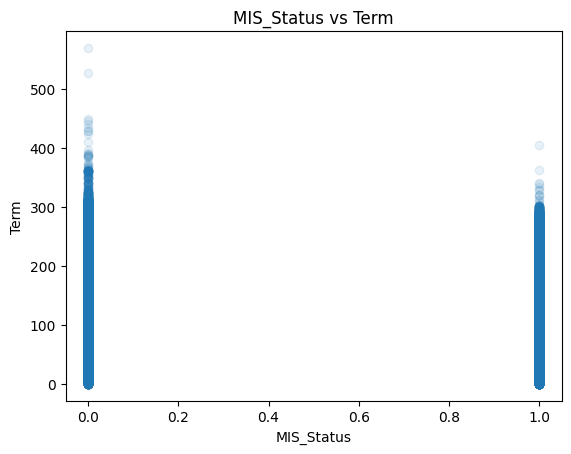

In [416]:
plt.scatter(x=df2['MIS_Status'], y=df2['Term'], alpha=0.1)
plt.xlabel('MIS_Status')
plt.ylabel('Term')
plt.title('MIS_Status vs Term')
plt.show()

In [417]:
df2.shape

df2.to_csv('dataset_test1.csv', index=False)
df2.head()

,State,Zip,BankState,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,MIS_Status,GrAppv,SBA_Appv,Industry,FranchiseBinary
0,IN,47711,OH,451120,84,4,2,0,0,1,0,N,Y,0,60000.0,48000.0,Retail_trade,0
1,IN,46526,IN,722410,60,2,2,0,0,1,0,N,Y,0,40000.0,32000.0,Accom/Food_serv,0
2,IN,47401,IN,621210,180,7,1,0,0,1,0,N,N,0,287000.0,215250.0,Healthcare/Social_assist,0
5,CT,6062,DE,332721,120,19,1,0,0,1,0,N,N,0,517000.0,387750.0,Manufacturing,0
7,FL,34491,AL,811118,84,1,2,0,0,1,0,N,Y,0,45000.0,36000.0,Other_no_pub,0


In [418]:
df2.head()

,State,Zip,BankState,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,MIS_Status,GrAppv,SBA_Appv,Industry,FranchiseBinary
0,IN,47711,OH,451120,84,4,2,0,0,1,0,N,Y,0,60000.0,48000.0,Retail_trade,0
1,IN,46526,IN,722410,60,2,2,0,0,1,0,N,Y,0,40000.0,32000.0,Accom/Food_serv,0
2,IN,47401,IN,621210,180,7,1,0,0,1,0,N,N,0,287000.0,215250.0,Healthcare/Social_assist,0
5,CT,6062,DE,332721,120,19,1,0,0,1,0,N,N,0,517000.0,387750.0,Manufacturing,0
7,FL,34491,AL,811118,84,1,2,0,0,1,0,N,Y,0,45000.0,36000.0,Other_no_pub,0


In [419]:
df2 = df2.drop(['CreateJob','RetainedJob'], axis = 1)


In [420]:
df2.head()

,State,Zip,BankState,NAICS,Term,NoEmp,NewExist,FranchiseCode,UrbanRural,RevLineCr,LowDoc,MIS_Status,GrAppv,SBA_Appv,Industry,FranchiseBinary
0,IN,47711,OH,451120,84,4,2,1,0,N,Y,0,60000.0,48000.0,Retail_trade,0
1,IN,46526,IN,722410,60,2,2,1,0,N,Y,0,40000.0,32000.0,Accom/Food_serv,0
2,IN,47401,IN,621210,180,7,1,1,0,N,N,0,287000.0,215250.0,Healthcare/Social_assist,0
5,CT,6062,DE,332721,120,19,1,1,0,N,N,0,517000.0,387750.0,Manufacturing,0
7,FL,34491,AL,811118,84,1,2,1,0,N,Y,0,45000.0,36000.0,Other_no_pub,0


In [421]:
df2.to_csv('dataset_test2.csv', index=False)
df2.head()

,State,Zip,BankState,NAICS,Term,NoEmp,NewExist,FranchiseCode,UrbanRural,RevLineCr,LowDoc,MIS_Status,GrAppv,SBA_Appv,Industry,FranchiseBinary
0,IN,47711,OH,451120,84,4,2,1,0,N,Y,0,60000.0,48000.0,Retail_trade,0
1,IN,46526,IN,722410,60,2,2,1,0,N,Y,0,40000.0,32000.0,Accom/Food_serv,0
2,IN,47401,IN,621210,180,7,1,1,0,N,N,0,287000.0,215250.0,Healthcare/Social_assist,0
5,CT,6062,DE,332721,120,19,1,1,0,N,N,0,517000.0,387750.0,Manufacturing,0
7,FL,34491,AL,811118,84,1,2,1,0,N,Y,0,45000.0,36000.0,Other_no_pub,0


In [422]:
df2.shape

(693871, 16)

In [423]:
df3 = df2.drop(['GrAppv', 'SBA_Appv'], axis =1)
df3.to_csv('dataset_test3.csv', index=False)

df3.head(15)

,State,Zip,BankState,NAICS,Term,NoEmp,NewExist,FranchiseCode,UrbanRural,RevLineCr,LowDoc,MIS_Status,Industry,FranchiseBinary
0,IN,47711,OH,451120,84,4,2,1,0,N,Y,0,Retail_trade,0
1,IN,46526,IN,722410,60,2,2,1,0,N,Y,0,Accom/Food_serv,0
2,IN,47401,IN,621210,180,7,1,1,0,N,N,0,Healthcare/Social_assist,0
5,CT,6062,DE,332721,120,19,1,1,0,N,N,0,Manufacturing,0
7,FL,34491,AL,811118,84,1,2,1,0,N,Y,0,Other_no_pub,0
8,FL,32456,FL,721310,297,2,2,1,0,N,N,0,Accom/Food_serv,0
10,NC,28256,GA,811111,84,1,2,1,0,N,Y,0,Other_no_pub,0
11,IL,60605,OR,235950,60,24,1,1,0,N,N,0,Construction,0
12,NC,27502,MN,445299,162,2,2,15100,1,N,N,0,Retail_trade,1
15,OK,73112,NC,421330,12,5,2,1,0,N,N,0,Wholesale_trade,0


In [424]:
new_df = df3.drop(['NewExist'], axis =1)

new_df.head(20)

,State,Zip,BankState,NAICS,Term,NoEmp,FranchiseCode,UrbanRural,RevLineCr,LowDoc,MIS_Status,Industry,FranchiseBinary
0,IN,47711,OH,451120,84,4,1,0,N,Y,0,Retail_trade,0
1,IN,46526,IN,722410,60,2,1,0,N,Y,0,Accom/Food_serv,0
2,IN,47401,IN,621210,180,7,1,0,N,N,0,Healthcare/Social_assist,0
5,CT,6062,DE,332721,120,19,1,0,N,N,0,Manufacturing,0
7,FL,34491,AL,811118,84,1,1,0,N,Y,0,Other_no_pub,0
8,FL,32456,FL,721310,297,2,1,0,N,N,0,Accom/Food_serv,0
10,NC,28256,GA,811111,84,1,1,0,N,Y,0,Other_no_pub,0
11,IL,60605,OR,235950,60,24,1,0,N,N,0,Construction,0
12,NC,27502,MN,445299,162,2,15100,1,N,N,0,Retail_trade,1
15,OK,73112,NC,421330,12,5,1,0,N,N,0,Wholesale_trade,0


In [425]:
new_df.shape

(693871, 13)

In [426]:
nombre_zeros = (new_df['Zip'] == 0).sum()
nombre_zeros

0

In [427]:
new_df['FranchiseCode'].value_counts()

FranchiseCode
1        469662
0        189378
78760      2208
68020      1696
17998       581
          ...  
21605         1
61896         1
79726         1
6750          1
18701         1
Name: count, Length: 2287, dtype: int64

In [428]:
new_df['FranchiseCode'].value_counts()

FranchiseCode
1        469662
0        189378
78760      2208
68020      1696
17998       581
          ...  
21605         1
61896         1
79726         1
6750          1
18701         1
Name: count, Length: 2287, dtype: int64

In [429]:
new_df['FranchiseCode'].unique()

array([    1, 15100, 10656, ..., 16452, 35618, 18701], dtype=int64)

In [430]:
new_df.to_csv('dataset_test4.csv', index=False)

In [431]:
new_df.dtypes

State              object
Zip                 Int64
BankState          object
NAICS               Int64
Term                int64
NoEmp               int64
FranchiseCode       int64
UrbanRural          int64
RevLineCr          object
LowDoc             object
MIS_Status          int64
Industry           object
FranchiseBinary     int64
dtype: object

In [432]:
df2.dtypes

State               object
Zip                  Int64
BankState           object
NAICS                Int64
Term                 int64
NoEmp                int64
NewExist             Int64
FranchiseCode        int64
UrbanRural           int64
RevLineCr           object
LowDoc              object
MIS_Status           int64
GrAppv             float64
SBA_Appv           float64
Industry            object
FranchiseBinary      int64
dtype: object